In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%config Completer.use_jedi = False

In [196]:
root = '/Users/haberkernh/Dropbox (HHMI)/2DstimSelection/blender4skybox/'
folder = 'unity-skybox-19h-el14_05-az281_37/'# 'unity-skybox-16h-el48_52-az250_65/'#'unity-skybox-13h-el68_25-az169_56/'#
path = root + folder
savename = '19h'

maxBit = 255

grad_F = Image.open(path + 'SkyBox_Front.png')
grad_L = Image.open(path + 'SkyBox_Left.png')
grad_R = Image.open(path + 'SkyBox_Right.png')
grad_B = Image.open(path + 'SkyBox_Back.png')
grad_U = Image.open(path + 'SkyBox_Up.png')
grad_D = Image.open(path + 'SkyBox_Down.png')

arrB = np.zeros((grad_F.size[0],grad_F.size[1],6))
arrG = np.zeros((grad_F.size[0],grad_F.size[1],6))
arrR = np.zeros((grad_F.size[0],grad_F.size[1],6))

arrAll = np.zeros((grad_F.size[0],grad_F.size[1],4,6))

In [197]:
arrAll[:,:,:,2] = np.array(grad_F)
arrAll[:,:,:,3] = np.array(grad_L)
arrAll[:,:,:,0] = np.array(grad_B)
arrAll[:,:,:,1] = np.array(grad_R)
arrAll[:,:,:,4] = np.array(grad_U)
arrAll[:,:,:,5] = np.array(grad_D)

gradB_F = Image.open(path + 'SkyBox_Front_blue.tif')
gradG_F = Image.open(path + 'SkyBox_Front_green.tif')
gradR_F = Image.open(path + 'SkyBox_Front_red.tif')
arrB[:,:,2] = np.array(gradB_F)
arrG[:,:,2] = np.array(gradG_F)
arrR[:,:,2] = np.array(gradR_F)

gradB_L = Image.open(path + 'SkyBox_Left_blue.tif')
gradG_L = Image.open(path + 'SkyBox_Left_green.tif')
gradR_L = Image.open(path + 'SkyBox_Left_red.tif')
arrB[:,:,3] = np.array(gradB_L)
arrG[:,:,3] = np.array(gradG_L)
arrR[:,:,3] = np.array(gradR_L)

gradB_B = Image.open(path + 'SkyBox_Back_blue.tif')
gradG_B = Image.open(path + 'SkyBox_Back_green.tif')
gradR_B = Image.open(path + 'SkyBox_Back_red.tif')
arrB[:,:,0] = np.array(gradB_B)
arrG[:,:,0] = np.array(gradG_B)
arrR[:,:,0] = np.array(gradR_B)

gradB_R = Image.open(path + 'SkyBox_Right_blue.tif')
gradG_R = Image.open(path + 'SkyBox_Right_green.tif')
gradR_R = Image.open(path + 'SkyBox_Right_red.tif')
arrB[:,:,1] = np.array(gradB_R)
arrG[:,:,1] = np.array(gradG_R)
arrR[:,:,1] = np.array(gradR_R)

gradB_U = Image.open(path + 'SkyBox_Up_blue.tif')
gradG_U = Image.open(path + 'SkyBox_Up_green.tif')
gradR_U = Image.open(path + 'SkyBox_Up_red.tif')
arrB[:,:,4] = np.array(gradB_U)
arrG[:,:,4] = np.array(gradG_U)
arrR[:,:,4] = np.array(gradR_U)

gradB_D = Image.open(path + 'SkyBox_Down_blue.tif')
gradG_D = Image.open(path + 'SkyBox_Down_green.tif')
gradR_D = Image.open(path + 'SkyBox_Down_red.tif')
arrB[:,:,5] = np.array(gradB_D)
arrG[:,:,5] = np.array(gradG_D)
arrR[:,:,5] = np.array(gradR_D)

In [198]:
horizon = int(gradB_F.size[1]/2)
vminval= 180

meanBG = np.mean(arrAll[:horizon,:,1:3,:], axis=2)
meanBGScaled = (meanBG[:,:,:] -np.min(meanBG[:,:,:]))
meanBGScaled = (meanBGScaled/np.max(meanBGScaled[:,:,:]))
meanBGScaled_sky = maxBit *(meanBGScaled-0.5)*2

Brescaled = arrAll[:horizon,:,2,:]
Brescaled = (Brescaled[:,:,:] -np.min(Brescaled[:,:,:]))
Brescaled = (Brescaled/np.max(Brescaled[:,:,:]))
Brescaled_sky = maxBit *(Brescaled-0.5)*2

Grescaled = arrAll[:horizon,:,1,:]
Grescaled = (Grescaled[:,:,:] -np.min(Grescaled[:,:,:]))
Grescaled = (Grescaled/np.max(Grescaled[:,:,:]))
Grescaled_sky = maxBit *(Grescaled-0.5)*2

Rrescaled = arrAll[:horizon,:,0,:]
Rrescaled = (Rrescaled[:,:,:] -np.min(Rrescaled[:,:,:]))
Rrescaled = (Rrescaled/np.max(Rrescaled[:,:,:]))
Rrescaled_sky = maxBit *(Rrescaled-0.5)*2

contrastBG = (Grescaled-Brescaled)/(Grescaled+Brescaled+0.0000000001)
contrastBG = (contrastBG[:,:,:]-np.min(contrastBG[:,:,:]))
contrastBG = (50.0 + 250.0*(contrastBG/np.max(contrastBG[:,:,:])))#.astype(int)

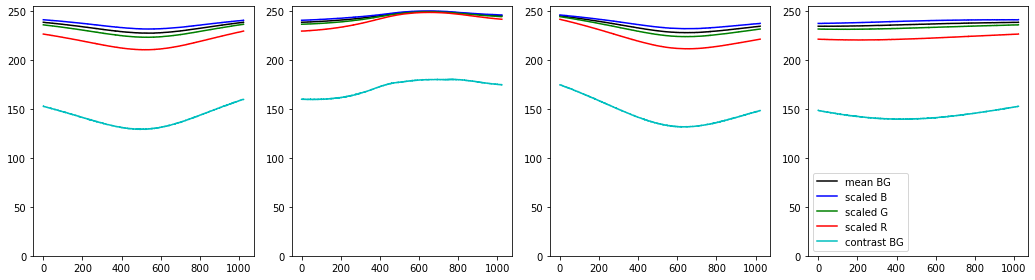

In [199]:
fig, axs = plt.subplots(1,4,figsize=(14.5,4))
for i in range(4):
    axs[i].plot(np.mean(meanBG[:,:,i],axis=0),'k', label="mean BG")
    axs[i].plot(np.mean(arrB[:horizon,:,i],axis=0),'b', label="B")
    axs[i].plot(np.mean(arrG[:horizon,:,i],axis=0),'g', label="G")
    axs[i].plot(np.mean(arrR[:horizon,:,i],axis=0),'r', label="R")
    axs[i].plot(np.mean(contrastBG[:,:,i],axis=0),'c', label="contrast BG")
    axs[i].set_ylim(0,255)
axs[i].legend()
fig.tight_layout()

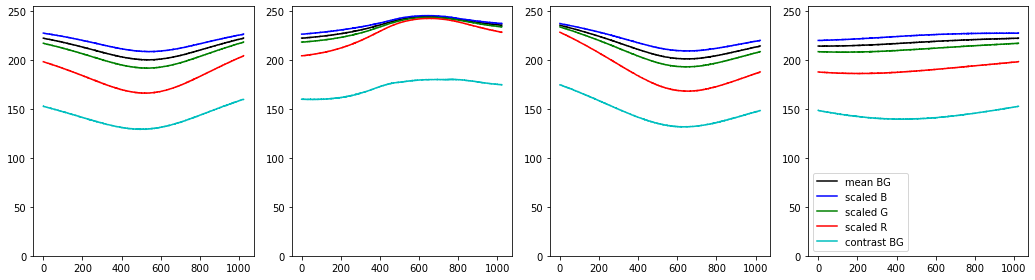

In [200]:
fig, axs = plt.subplots(1,4,figsize=(14.5,4))
for i in range(4):
    axs[i].plot(np.mean(meanBGScaled_sky[:,:,i],axis=0),'k', label="mean BG")
    axs[i].plot(np.mean(Brescaled_sky[:,:,i],axis=0),'b', label="scaled B")
    axs[i].plot(np.mean(Grescaled_sky[:,:,i],axis=0),'g', label="scaled G")
    axs[i].plot(np.mean(Rrescaled_sky[:,:,i],axis=0),'r', label="scaled R")
    axs[i].plot(np.mean(contrastBG[:,:,i],axis=0),'c', label="contrast BG")
    axs[i].set_ylim(0,255)
axs[i].legend()
fig.tight_layout()
fig.savefig('gradientComparison_average_{}.pdf'.format(savename))

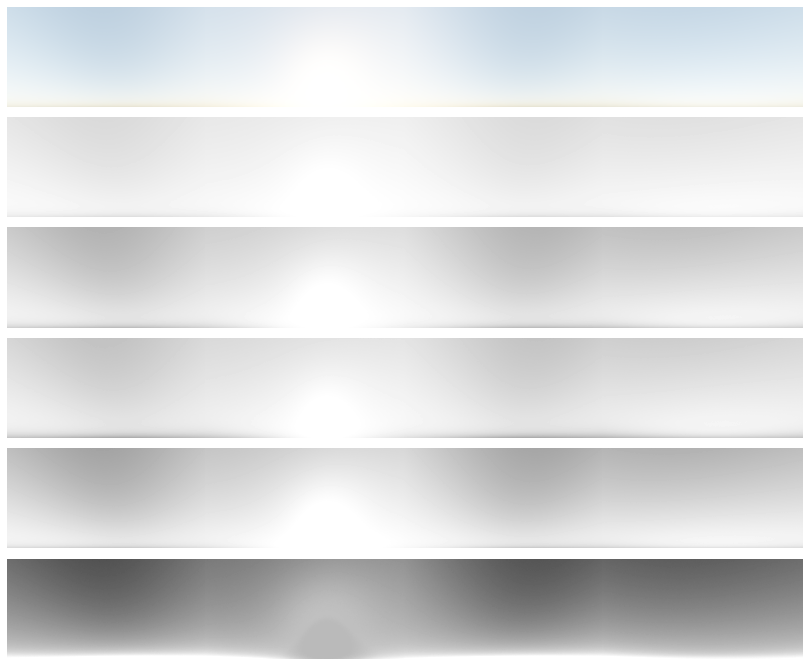

In [201]:
fig, axs = plt.subplots(6,4, figsize=(14.25,12))
for i in range(4):
    axs[0,i].imshow(arrAll[:horizon,:,:,i].astype(int))
    axs[1,i].imshow(meanBG[:,:,i], vmin=0,vmax=254, cmap='gray')
    axs[2,i].imshow(meanBGScaled_sky[:,:,i], vmin=0,vmax=254, cmap='gray')
    axs[3,i].imshow(Brescaled_sky[:,:,i], vmin=0,vmax=254, cmap='gray')
    axs[4,i].imshow(Grescaled_sky[:,:,i], vmin=0,vmax=254, cmap='gray')
    axs[5,i].imshow(contrastBG[:,:,i], vmin=0,vmax=255,  cmap='gray') #vmin=0,vmax=254,

    for ax in axs[:,i]:
        ax.set_axis_off()
        ax.set_aspect('equal')
plt.subplots_adjust(wspace=-0.01, hspace=0.1)
fig.savefig('gradientComparison_original_derrived_{}.pdf'.format(savename))

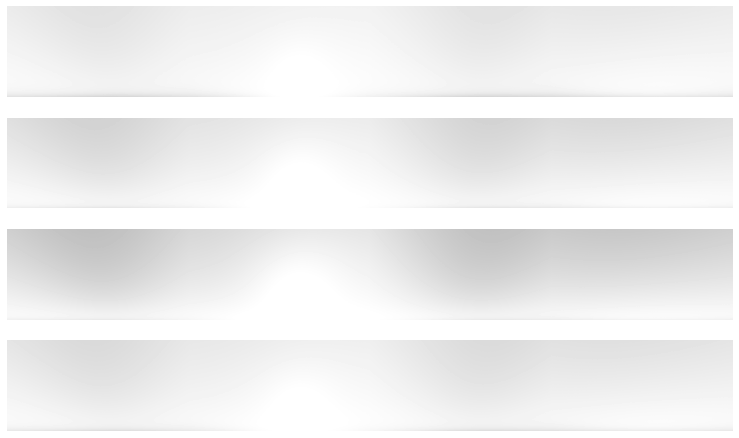

In [202]:
fig, axs = plt.subplots(4,4, figsize=(13,8))
for i in range(4):
    axs[0,i].imshow(arrB[:horizon,:,i], vmin=0,vmax=254, cmap='gray')
    axs[1,i].imshow(arrG[:horizon,:,i], vmin=0,vmax=254, cmap='gray')
    axs[2,i].imshow(arrR[:horizon,:,i], vmin=0,vmax=254, cmap='gray')
    
    axs[3,i].imshow(meanBG[:horizon,:,i], vmin=0,vmax=254, cmap='gray')

    for ax in axs[:,i]:
        ax.set_axis_off()
        ax.set_aspect('equal')
plt.subplots_adjust(wspace=0, hspace=0.1)
fig.savefig('gradientComparison_RGBgrey_{}.pdf'.format(savename))

## Generate mean of blue green skybox texture

In [203]:
pt_per_cm = 150
dpiVal = 1000

meanBG = np.mean(arrAll[:,:,1:3,:], axis=2).astype('int')

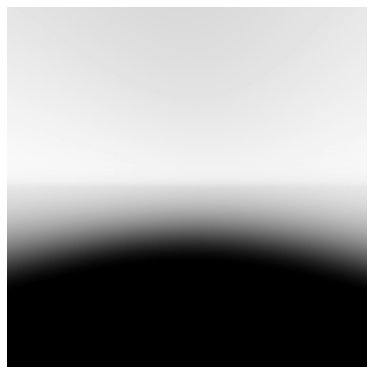

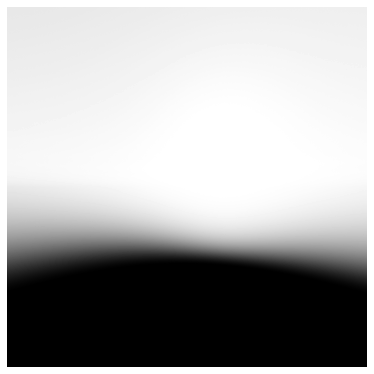

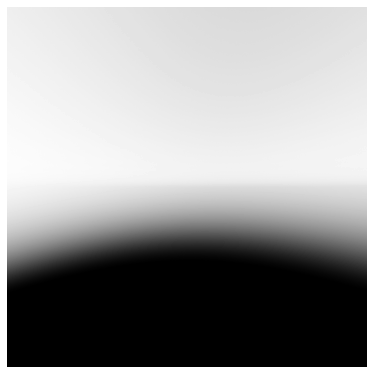

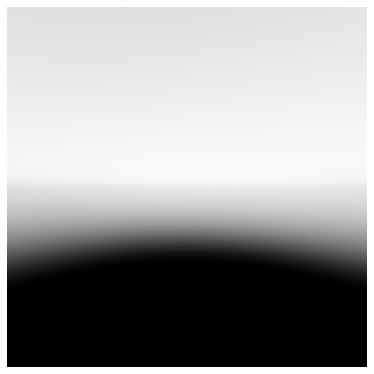

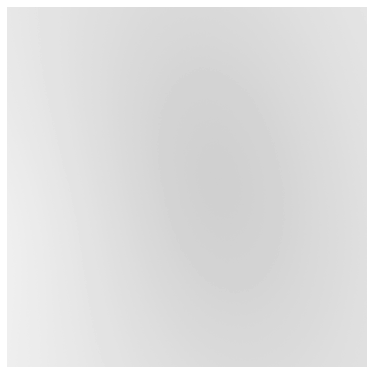

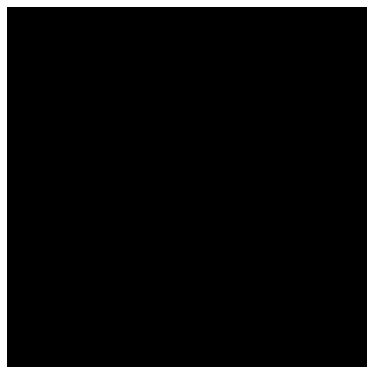

In [204]:
for side, name in enumerate(['Back','Right','Front','Left','Up','Down']):
    fig = plt.figure(frameon=False)
    fig.set_size_inches(5,5)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(meanBG[:,:,side], vmin=0,vmax=254, cmap='gray')
    fig.savefig(path+"Skybox_mean_{}_{}.png".format(name,savename),dpi = dpiVal)

## Generate scaled skybox textures 

In [205]:
meanBG = np.mean(arrAll[:,:,1:3,:], axis=2)
meanBGScaled = (meanBG[:,:,:] -np.min(meanBG[:,:,:]))
meanBGScaled = (meanBGScaled/np.max(meanBGScaled[:,:,:]))
meanBGScaled_sky = maxBit *(meanBGScaled-0.5)*2

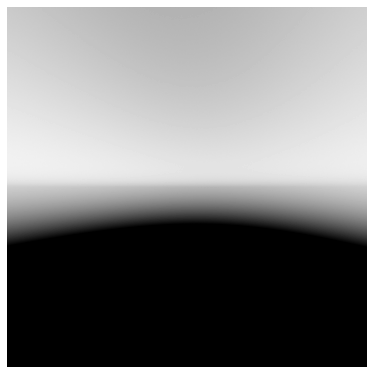

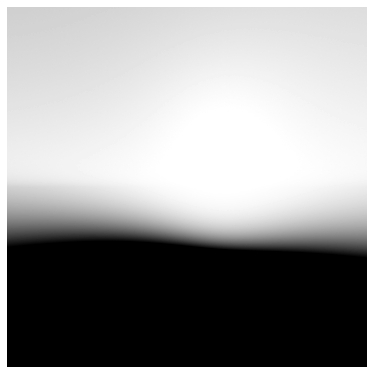

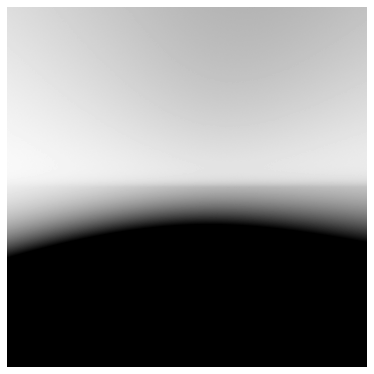

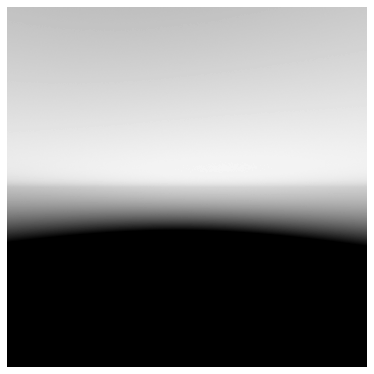

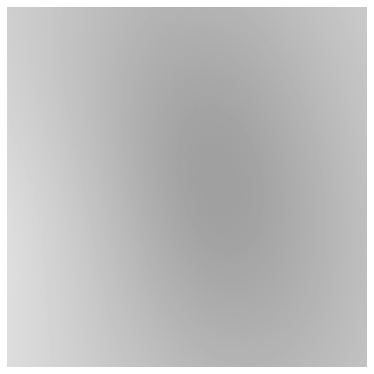

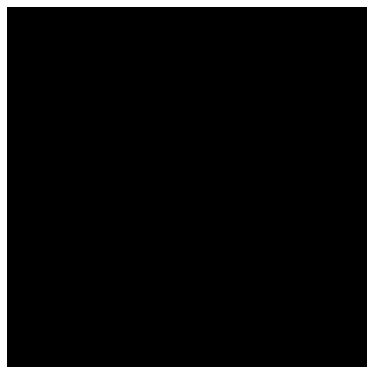

In [206]:
for side, name in enumerate(['Back','Right','Front','Left','Up','Down']):
    fig = plt.figure(frameon=False)
    fig.set_size_inches(5,5)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(meanBGScaled_sky[:,:,side], vmin=0,vmax=254, cmap='gray')
    fig.savefig(path+"Skybox_meanRescaled_{}_{}.png".format(name,savename),dpi = dpiVal)